In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("weatherHistory.csv")
df.head()

In [2]:
df.info()
df = df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary', 'Loud Cover', 'Apparent Temperature (C)'], axis=1)

df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447
Humidity,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000


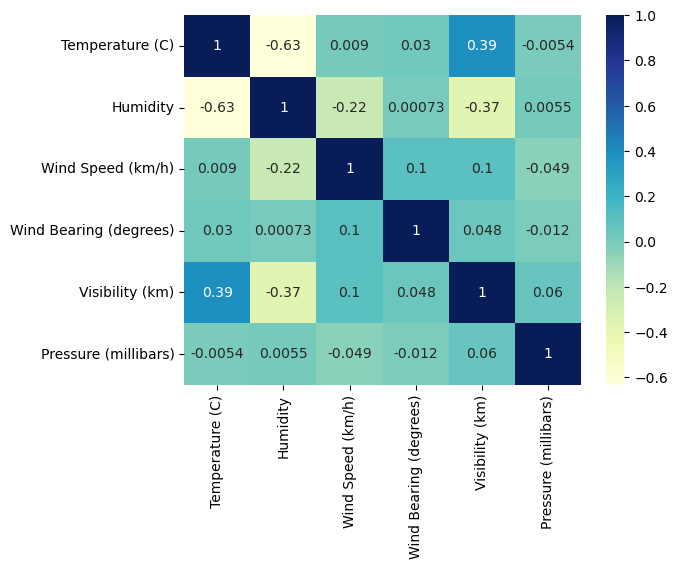

In [3]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

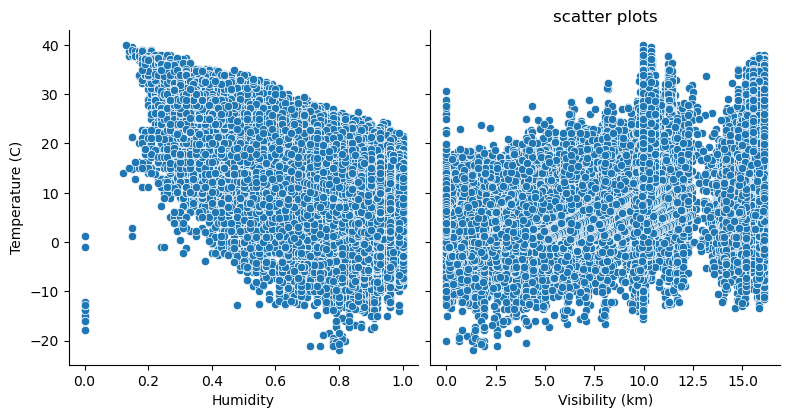

In [6]:
sns.pairplot(df, x_vars=['Humidity', 'Visibility (km)'], y_vars='Temperature (C)', height=4, aspect=1, kind='scatter')
plt.title('scatter plots')
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (C)         96453 non-null  float64
 1   Humidity                96453 non-null  float64
 2   Wind Speed (km/h)       96453 non-null  float64
 3   Wind Bearing (degrees)  96453 non-null  float64
 4   Visibility (km)         96453 non-null  float64
 5   Pressure (millibars)    96453 non-null  float64
dtypes: float64(6)
memory usage: 4.4 MB


In [8]:
X = df['Humidity'].values.reshape(-1, 1)
y = df['Temperature (C)'].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [9]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.intercept_)
print(lreg.coef_)



[34.68005785]
[[-30.96977301]]


In [10]:
y_pred = lreg.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)



          Actual  Predicted
0      22.200000  11.143030
1       4.811111  15.788496
2      14.422222   4.949076
3      12.777778   4.949076
4      21.666667  12.691519
...          ...        ...
28931   3.794444   7.116960
28932  20.000000  12.072124
28933   0.066667   4.019983
28934   4.516667  10.213937
28935  20.088889   6.187867

[28936 rows x 2 columns]


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6.02
Mean squared error: 54.51
Root mean squared error: 7.38


In [15]:
X = df.drop('Temperature (C)',axis= 1)
y = df['Temperature (C)']
train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

lreg2 = LinearRegression()

lreg2.fit(X_train, y_train)
print(lreg2.intercept_)
print(lreg2.coef_)

[34.68005785]
[[-30.96977301]]
